# Hybrid: V9
## SD: model V13
## NetLogo: V21
## Python: V5

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysd
import pyNetLogo

# Defining the Hybridmodel

In [2]:
def runnetlogo(agent_gas, netlogo):
    netlogo.write_NetLogo_attriblist(agent_gas[['who','GS', 'PP']], 'country')
    netlogo.command('repeat 1 [go]')
    
    importA = netlogo.report('importA')
    exportA = netlogo.report('exportA')
    importB = netlogo.report('importB')
    exportB = netlogo.report('exportB')
    importC = netlogo.report('importC')
    exportC = netlogo.report('exportC')
    importD = netlogo.report('importD')
    exportD = netlogo.report('exportD')
    importE = netlogo.report('importE')
    exportE = netlogo.report('exportE')
    importF = netlogo.report('importF')
    exportF = netlogo.report('exportF')
    
    return importA, exportA, importB, exportB, importC, exportC, importD, exportD, importE, exportE, importF, exportF

In [3]:
def updatedicts(Input, results, importtot, exporttot, x, dealtime):
    
    Input['"Initial extraction capacity in preparation - Gas"'] = results['"Extraction capacity in preparation - Gas"'].values[x]
    Input['"Initial extraction capacity - Gas"'] = results['"Extraction capacity installed - Gas"'].values[x]
    Input['"Initial mothballed capacity - Gas"'] = results['"Mothballed capacity - Gas"'].values[x]
    Input['"Initial Undiscovered resources - Gas"'] = results['"Undiscovered resources - Gas"'].values[x]
    Input['"Initial reserve base - Gas"'] = results['"Discovered resources reserve base - Gas"'].values[x]
                  
    Input['"Initial extraction capacity in preparation - Oil"'] = results['"Extraction capacity in preparation - Oil"'].values[x]
    Input['"Initial extraction capacity - Oil"'] = results['"Extraction capacity installed - Oil"'].values[x]
    Input['"Initial mothballed capacity - Oil"'] = results['"Mothballed capacity - Oil"'].values[x]
    Input['"Initial Energy stocks - Oil"'] = results['"Energy stocks - Oil"'].values[x]
    Input['"Initial Undiscovered resources - Oil"'] = results['"Undiscovered resources - Oil"'].values[x]
    Input['"Initial reserve base - Oil"'] = results['"Discovered resources reserve base - Oil"'].values[x]
              
    Input['"Initial extraction capacity in preparation - Coal"'] = results['"Extraction capacity in preparation - Coal"'].values[x]
    Input['"Initial extraction capacity - Coal"'] = results['"Extraction capacity installed - Coal"'].values[x]
    Input['"Initial mothballed capacity - Coal"'] = results['"Mothballed capacity - Coal"'].values[x]
    Input['"Initial Energy stocks - Coal"'] = results['"Energy stocks - Coal"'].values[x]
    Input['"Initial Undiscovered resources - Coal"'] = results['"Undiscovered resources - Coal"'].values[x]
    Input['"Initial reserve base - Coal"'] = results['"Discovered resources reserve base - Coal"'].values[x]
              
    Input['"Initial extraction capacity in preparation- Nuclear"'] = results['"Extraction capacity in preparation- Nuclear"'].values[x]
    Input['"Initial extraction capacity- Nuclear"'] = results['"Extraction capacity installed- Nuclear"'].values[x]
    Input['"Initial mothballed capacity- Nuclear"'] = results['"Mothballed capacity- Nuclear"'].values[x]
              
    Input['"Initial extraction capacity in preparation - Biofuels"'] = results['"Extraction capacity in preparation - Biofuels"'].values[x]
    Input['"Initial extraction capacity - Biofuels"'] = results['"Extraction capacity installed - Biofuels"'].values[x]
    Input['"Initial mothballed capacity - Biofuels"'] = results['"Mothballed capacity - Biofuels"'].values[x]
    Input['"Initial Energy stocks - Biofuels"'] = results['"Energy stocks - Biofuels"'].values[x]
              
    Input['"Initial extraction capacity in preparation - other Renewables"'] = results['"Extraction capacity in preparation - other Renewables"'].values[x] 
    Input['"Initial extraction capacity - other Renewables"'] = results['"Extraction capacity installed - other Renewables"'].values[x]
    Input['"Initial mothballed capacity - other Renewables"'] = results['"Mothballed capacity - other Renewables"'].values[x]
           
    Input['Initial GDP'] = results['GDP'].values[x]
    Input['Initial Energy Intensity GDP'] = results['Energy Intensity GDP'].values[x]
    Input['Initial Shortage Effect on Decoupling'] = results['Future Effect of Shortage on Decoupling'].values[x]
    Input['Initial Effect of Supply Shortage on Decoupling'] = results['Effect of Supply Shortage on Decoupling'].values[x]

    Input['Gas Import'] = importtot 
    Input['Gas Export'] = exporttot
    Input['INITIAL TIME'] = results['TIME'].values[x]
    Input['FINAL TIME'] = results['TIME'].values[x]+dealtime
                  
    return Input

In [4]:
def hybridloop(InputA, InputB, InputC, InputD, InputE, InputF, years, dealtime, debug):
    model = pysd.read_vensim("modelV15.mdl")
    netlogo = pyNetLogo.NetLogoLink(gui=False)
    netlogo.load_model(r'modelv21.nlogo')
    netlogo.command('setup')
    
    InputA['FINAL TIME'] = 2010 + dealtime
    InputB['FINAL TIME'] = 2010 + dealtime
    InputC['FINAL TIME'] = 2010 + dealtime
    InputD['FINAL TIME'] = 2010 + dealtime
    InputE['FINAL TIME'] = 2010 + dealtime
    InputF['FINAL TIME'] = 2010 + dealtime
    
    resultsAnew = model.run(params = InputA)
    resultsBnew = model.run(params = InputB)
    resultsCnew = model.run(params = InputC)
    resultsDnew = model.run(params = InputD)
    resultsEnew = model.run(params = InputE)
    resultsFnew = model.run(params = InputF)
    
    x = dealtime*16

    resultsA = resultsAnew
    resultsB = resultsBnew
    resultsC = resultsCnew
    resultsD = resultsDnew
    resultsE = resultsEnew
    resultsF = resultsFnew
    
    n = dealtime
    while n < years:
        
        GSA = resultsAnew['Gas to trade'].values[x]
        GSB = resultsBnew['Gas to trade'].values[x]
        GSC = resultsCnew['Gas to trade'].values[x]
        GSD = resultsDnew['Gas to trade'].values[x]
        GSE = resultsEnew['Gas to trade'].values[x]
        GSF = resultsFnew['Gas to trade'].values[x]
        
        if debug > 0:
            print("Years Modeled = ",n)
            print("Start Netlogo")
            print("GSA = ",GSA)
            print("GSB = ",GSB)
            print("GSC = ",GSC)
            print("GSD = ",GSD)
            print("GSE = ",GSE)
            print("GSF = ",GSF)
        
        gasdata = {'who': [0, 1, 2, 3, 4, 5],
                  'GS': [GSA, GSB, GSC, GSD, GSE, GSF],
                  'PP': [9, 5, 9, 10, 4, 6]}
        
        agent_gas = pd.DataFrame (gasdata, columns = ['who', 'GS', 'PP'])
        
        importA, exportA, importB, exportB, importC, exportC, importD, exportD, importE, exportE, importF, exportF = runnetlogo(agent_gas, netlogo)
        
        if debug > 1:
            print("ImportA = ", importA)
            print("ExportA = ", exportA)
            print("ImportB = ", importB)
            print("ExportB = ", exportB)
            print("ImportC = ", importC)
            print("ExportC = ", exportC)
            print("ImportD = ", importD)
            print("ExportD = ", exportD)
            print("ImportE = ", importE)
            print("ExportE = ", exportE)
            print("ImportF = ", importF)
            print("ExportF = ", exportF)
            print("Start Vensim")
        
        InputA = updatedicts(InputA, resultsAnew, importA, exportA, x, dealtime)
        InputB = updatedicts(InputB, resultsBnew, importB, exportB, x, dealtime)
        InputC = updatedicts(InputC, resultsCnew, importC, exportC, x, dealtime)
        InputD = updatedicts(InputD, resultsDnew, importD, exportD, x, dealtime)
        InputE = updatedicts(InputE, resultsEnew, importE, exportE, x, dealtime)
        InputF = updatedicts(InputF, resultsFnew, importF, exportF, x, dealtime)
        
        resultsAnew = model.run(params = InputA)
        resultsBnew = model.run(params = InputB)
        resultsCnew = model.run(params = InputC)
        resultsDnew = model.run(params = InputD)
        resultsEnew = model.run(params = InputE)
        resultsFnew = model.run(params = InputF)
        
        resultsA = resultsA.append(resultsAnew)
        resultsB = resultsB.append(resultsBnew)
        resultsC = resultsC.append(resultsCnew)
        resultsD = resultsD.append(resultsDnew)
        resultsE = resultsE.append(resultsEnew)
        resultsF = resultsF.append(resultsFnew)
           
        n = n + dealtime
        
    return resultsA, resultsB, resultsC, resultsD, resultsE, resultsF

# Defining Input

In [5]:
InputA = {'"Initial extraction capacity in preparation - Gas"': 0,
        '"Initial extraction capacity - Gas"': 6.38386e+07,
        '"Initial extraction capacity in preparation - Oil"': 0,
        '"Initial extraction capacity - Oil"': 9.74533e+07,
        '"Initial extraction capacity in preparation - Coal"': 0,
        '"Initial extraction capacity - Coal"': 1.90307e+07,
        '"Initial extraction capacity in preparation- Nuclear"': 0,
        '"Initial extraction capacity- Nuclear"': 1.134e+07,
        '"Initial extraction capacity in preparation - Biofuels"': 64010,
        '"Initial extraction capacity - Biofuels"': 674000,
        '"Initial extraction capacity in preparation - other Renewables"': 3.105e+06,
        '"Initial extraction capacity - other Renewables"': 1.203e+07,
           
        'Initial GDP': 2.06942e+13,
        'Initial Energy Intensity GDP': 1/157500,
        'Initial Shortage Effect on Decoupling': 0,
          
        'Gas Import': 0,
        'Gas Export': 0}

InputB = {'"Initial extraction capacity in preparation - Gas"': 0,
        '"Initial extraction capacity - Gas"': 6.38386e+07,
        '"Initial extraction capacity in preparation - Oil"': 0,
        '"Initial extraction capacity - Oil"': 9.74533e+07,
        '"Initial extraction capacity in preparation - Coal"': 0,
        '"Initial extraction capacity - Coal"': 1.90307e+07,
        '"Initial extraction capacity in preparation- Nuclear"': 0,
        '"Initial extraction capacity- Nuclear"': 1.134e+02,
        '"Initial extraction capacity in preparation - Biofuels"': 64010,
        '"Initial extraction capacity - Biofuels"': 674000,
        '"Initial extraction capacity in preparation - other Renewables"': 3.105e+06,
        '"Initial extraction capacity - other Renewables"': 1.203e+07,
           
        'Initial GDP': 2.06942e+13,
        'Initial Energy Intensity GDP': 1/157500,
        'Initial Shortage Effect on Decoupling': 0,
          
        'Gas Import': 0,
        'Gas Export': 0}

InputC = {'"Initial extraction capacity in preparation - Gas"': 0,
        '"Initial extraction capacity - Gas"': 6.38386e+04,
        '"Initial extraction capacity in preparation - Oil"': 0,
        '"Initial extraction capacity - Oil"': 9.74533e+07,
        '"Initial extraction capacity in preparation - Coal"': 0,
        '"Initial extraction capacity - Coal"': 1.90307e+07,
        '"Initial extraction capacity in preparation- Nuclear"': 0,
        '"Initial extraction capacity- Nuclear"': 1.134e+07,
        '"Initial extraction capacity in preparation - Biofuels"': 64010,
        '"Initial extraction capacity - Biofuels"': 674000,
        '"Initial extraction capacity in preparation - other Renewables"': 3.105e+06,
        '"Initial extraction capacity - other Renewables"': 1.203e+07,
           
        'Initial GDP': 2.06942e+11,
        'Initial Energy Intensity GDP': 1/157500,
        'Initial Shortage Effect on Decoupling': 0,
          
        'Gas Import': 0,
        'Gas Export': 0}

InputD = {'"Initial extraction capacity in preparation - Gas"': 0,
        '"Initial extraction capacity - Gas"': 6.38386e+07,
        '"Initial extraction capacity in preparation - Oil"': 0,
        '"Initial extraction capacity - Oil"': 9.74533e+07,
        '"Initial extraction capacity in preparation - Coal"': 0,
        '"Initial extraction capacity - Coal"': 1.90307e+07,
        '"Initial extraction capacity in preparation- Nuclear"': 0,
        '"Initial extraction capacity- Nuclear"': 1.134e+07,
        '"Initial extraction capacity in preparation - Biofuels"': 64010,
        '"Initial extraction capacity - Biofuels"': 674000,
        '"Initial extraction capacity in preparation - other Renewables"': 3.105e+06,
        '"Initial extraction capacity - other Renewables"': 1.203e+07,
           
        'Initial GDP': 2.06942e+13,
        'Initial Energy Intensity GDP': 1/157500,
        'Initial Shortage Effect on Decoupling': 0,
          
        'Gas Import': 0,
        'Gas Export': 0}

InputE = {'"Initial extraction capacity in preparation - Gas"': 0,
        '"Initial extraction capacity - Gas"': 6.38386e+07,
        '"Initial extraction capacity in preparation - Oil"': 0,
        '"Initial extraction capacity - Oil"': 9.74533e+07,
        '"Initial extraction capacity in preparation - Coal"': 0,
        '"Initial extraction capacity - Coal"': 1.90307e+07,
        '"Initial extraction capacity in preparation- Nuclear"': 0,
        '"Initial extraction capacity- Nuclear"': 1.134e+07,
        '"Initial extraction capacity in preparation - Biofuels"': 64010,
        '"Initial extraction capacity - Biofuels"': 674000,
        '"Initial extraction capacity in preparation - other Renewables"': 3.105e+06,
        '"Initial extraction capacity - other Renewables"': 1.203e+07,
           
        'Initial GDP': 2.06942e+13,
        'Initial Energy Intensity GDP': 1/157500,
        'Initial Shortage Effect on Decoupling': 0,
          
        'Gas Import': 0,
        'Gas Export': 0}

InputF = {'"Initial extraction capacity in preparation - Gas"': 0,
        '"Initial extraction capacity - Gas"': 6.38386e+07,
        '"Initial extraction capacity in preparation - Oil"': 0,
        '"Initial extraction capacity - Oil"': 9.74533e+07,
        '"Initial extraction capacity in preparation - Coal"': 0,
        '"Initial extraction capacity - Coal"': 1.90307e+07,
        '"Initial extraction capacity in preparation- Nuclear"': 0,
        '"Initial extraction capacity- Nuclear"': 1.134e+07,
        '"Initial extraction capacity in preparation - Biofuels"': 64010,
        '"Initial extraction capacity - Biofuels"': 674000,
        '"Initial extraction capacity in preparation - other Renewables"': 3.105e+06,
        '"Initial extraction capacity - other Renewables"': 1.203e+07,
           
        'Initial GDP': 2.06942e+13,
        'Initial Energy Intensity GDP': 1/157500,
        'Initial Shortage Effect on Decoupling': 0,
          
        'Gas Import': 0,
        'Gas Export': 0}

In [6]:
Inputall = {'InputA', 'InputB'}

In [7]:
Inputall

{'InputA', 'InputB'}

# Running the Model

In [8]:
resultsA, resultsB, resultsC, resultsD, resultsE, resultsF = hybridloop(InputA, InputB, InputC, InputD, InputE, InputF, 40, 5,0)

modelV15.py:1399: RuntimeWarning: invalid value encountered in double_scalars
  cumulative_extracted_fuel_t1__other_renewables())**experience_curve_parameter_extraction()
modelV15.py:807: RuntimeWarning: overflow encountered in double_scalars
  relative_potential_eroei__other_renewables()
C:\Users\ludov\Anaconda32\lib\site-packages\pysd\functions.py:345: RuntimeWarning: invalid value encountered in double_scalars
  return numerator*1.0/denominator
modelV15.py:1385: RuntimeWarning: invalid value encountered in double_scalars
  ) * (cumulative_extracted_fuel__biofuels() / cumulative_extracted_fuel_t1__biofuels())**experience_curve_parameter_extraction()


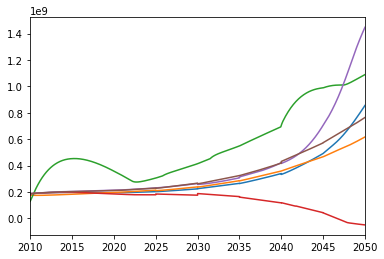

In [13]:
resultsA['Total Energy Supply'].plot()
resultsB['Total Energy Supply'].plot()
resultsC['Total Energy Supply'].plot()
resultsD['Total Energy Supply'].plot()
resultsE['Total Energy Supply'].plot()
resultsF['Total Energy Supply'].plot()

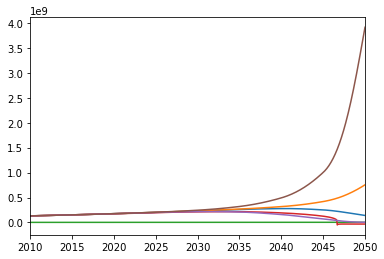

In [12]:
resultsA['Energy Demand'].plot()
resultsB['Energy Demand'].plot()
resultsC['Energy Demand'].plot()
resultsD['Energy Demand'].plot()
resultsE['Energy Demand'].plot()
resultsF['Energy Demand'].plot()